In [13]:
# Show graphs inline, as part of the notebook
%matplotlib inline

# Show graphs in a separate window
#%matplotlib osx
#%matplotlib qt  
# wx, gtk, osx, tk
#%matplotlib # empty uses default

# scale jupyter notebook to width of browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import scipy.stats as st

from sklearn.preprocessing import minmax_scale

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as pp

# http://pydub.com
# https://github.com/jiaaro/pydub
from pydub import AudioSegment
from pydub.playback import play

import random
import sys
import io
import os
import time
import glob
import IPython

from python_speech_features import mfcc, fbank, logfbank

# local library of helpful functions
import library as lib
from importlib import reload
library = reload(lib)

AhemPreventor library load success.


## Load Audio Data

In [2]:
audioDir = "AudioData"
labelDir = "AudioData/Labeling"
fileNames = ["Uebung-01", "Uebung-02", "Uebung-03", "Uebung-06", "Uebung-07", "Uebung-08", "Uebung-09", "Uebung-10", "Vorlesung-01", "Vorlesung-02", "Vorlesung-03", "Vorlesung-04"]
audioFilePaths = [audioDir + "/" + fileName + ".wav" for fileName in fileNames]
labelFilePaths = [labelDir + "/" + fileName + ".txt" for fileName in fileNames]

audioAndLabelFiles = []
currentIndex = 1
for audioFilePath, labelFilePath in zip(audioFilePaths, labelFilePaths):
    audioFile = library.load_audio(audioFilePath)
    labelFile = np.genfromtxt(labelFilePath, delimiter="\t")[:,:2] * 1000 # convert s to ms (ms used by pydub)
    
    audioDataArray = audioFile.get_array_of_samples()
    
    print("Loaded file ", audioFilePath, "- length", (len(audioDataArray) / library.sampling_frequency / 60), 
          "min, Aehm count: ", len(labelFile), "Max value", np.max(audioDataArray), "\n")
    
    speaker = 0 # michael
    if currentIndex <= 3: speaker = 1 # beren
    if currentIndex > 3 and currentIndex <= 8: speaker = 2 # tim
    currentIndex += 1
    
    audioAndLabelFiles.append((audioFilePath.split("/")[1], audioFile, labelFile, speaker))
    
print("Loading files complete!")



Loaded file  AudioData/Uebung-01.wav - length 30.03513020833333 min, Aehm count:  88 Max value 31039 

Loaded file  AudioData/Uebung-02.wav - length 43.61886354166666 min, Aehm count:  178 Max value 31353 

Loaded file  AudioData/Uebung-03.wav - length 42.56587083333333 min, Aehm count:  111 Max value 31794 

Loaded file  AudioData/Uebung-06.wav - length 43.643630208333335 min, Aehm count:  54 Max value 31197 

Loaded file  AudioData/Uebung-07.wav - length 53.76494583333333 min, Aehm count:  32 Max value 30885 

Loaded file  AudioData/Uebung-08.wav - length 41.07248645833333 min, Aehm count:  40 Max value 31272 

Loaded file  AudioData/Uebung-09.wav - length 45.34521458333334 min, Aehm count:  41 Max value 31596 

Loaded file  AudioData/Uebung-10.wav - length 21.085635416666666 min, Aehm count:  36 Max value 27868 

Loaded file  AudioData/Vorlesung-01.wav - length 108.40661979166666 min, Aehm count:  251 Max value 32767 

Loaded file  AudioData/Vorlesung-02.wav - length 97.460364583333

### Statistics on Hand-Labeled Positives

For speaker 1, file Uebung-01.wav Aehm count (88,), mean duration 323.5 ms (SD = 94.8 ms), duration 95pct CI upper bound: 495 ms
For speaker 1, file Uebung-02.wav Aehm count (178,), mean duration 347.0 ms (SD = 121.5 ms), duration 95pct CI upper bound: 538 ms
For speaker 1, file Uebung-03.wav Aehm count (111,), mean duration 346.5 ms (SD = 111.6 ms), duration 95pct CI upper bound: 526 ms
For speaker 2, file Uebung-06.wav Aehm count (54,), mean duration 457.2 ms (SD = 101.0 ms), duration 95pct CI upper bound: 643 ms
For speaker 2, file Uebung-07.wav Aehm count (32,), mean duration 516.7 ms (SD = 134.8 ms), duration 95pct CI upper bound: 718 ms
For speaker 2, file Uebung-08.wav Aehm count (40,), mean duration 555.8 ms (SD = 109.0 ms), duration 95pct CI upper bound: 806 ms
For speaker 2, file Uebung-09.wav Aehm count (41,), mean duration 231.9 ms (SD = 82.6 ms), duration 95pct CI upper bound: 391 ms
For speaker 2, file Uebung-10.wav Aehm count (36,), mean duration 227.3 ms (SD = 58.4 ms),

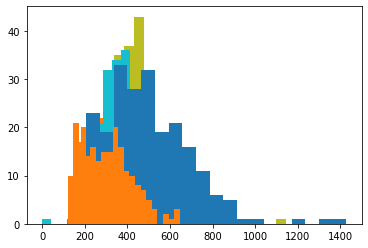

In [5]:
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    durations = labelFile[:,1] - labelFile[:,0]
    pp.hist(durations, bins=20)
    print("For speaker %d, file %s Aehm count %s, mean duration %.1f ms (SD = %.1f ms), duration 95pct CI upper bound: %.0f ms" 
          % (speaker, path, str(durations.shape), np.mean(durations), np.std(durations), np.percentile(durations, 95)))

### Verify Ahems manually

In [ ]:
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    print("Playing Aehms for file %s" % path)
    # play positives
    for i in range(len(labelFile)):
        print(i, labelFile[i,0], labelFile[i,1])
        aehmSound = audioFile[labelFile[i,0] : labelFile[i,1]]
        #s.export("tmp.wav", format = 'wav')
        #IPython.display.Audio("tmp.wav")
        play(aehmSound)
        time.sleep(.2)
        #input()  # manual check

## Data generation

## Grab data from one sample for testing

In [6]:
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    start_pos = labelFile[10,0]
    currentSample = library.getSample(audioFile, start_pos, True)
    
    features = library.compute_mfcc(currentSample)
    
    print(currentSample.shape, currentSample)
    print(features.shape, features)
    
    np.savetxt("sample.txt", currentSample)
    np.savetxt("features.txt", features)
    
    break

sampleData has shape  (12000,)
(12000,) [   448.72176782    329.37941578    222.85190616 ... -13635.03984604
 -12697.89907992 -14540.44046505]
(49, 40) [[ -0.61157278  -1.01764606  10.40516139 ...   2.40205315   5.81572123
    2.34646589]
 [ -0.85616491   6.31033455   6.78723765 ... -12.42598632   1.80864772
    0.22489361]
 [ -0.69694887  -0.144401     5.20076819 ...  -2.88671698   6.67627266
    1.02786734]
 ...
 [  2.16615446  -7.39945477  -0.08497586 ...  -4.31974027  -1.46446116
    1.19601663]
 [  1.83671908  -4.02759354  -0.38162483 ...   1.28785602   1.44044406
   -7.18544441]
 [  1.350156    -2.53964873  -2.77362272 ...  -4.85594362   0.60749459
    5.80918092]]


## Generate positive samples

In [14]:
SAVE_FOLDER = "PrecomputedSpecialFeatures"
METHOD_USED = library.compute_mfcc

# Generate X different versions of the positive samples with noise
positivesMultiplier = 25

totalPositivesSampleCounter = 0
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    allFeaturesData = None
    for i in range(len(labelFile)):
        start_pos = labelFile[i,0]
        currentSample = library.getSample(audioFile, start_pos, False)

        features = METHOD_USED(currentSample) 
        if allFeaturesData is None:
            allFeaturesData = np.zeros((len(labelFile)*positivesMultiplier, features.shape[0], features.shape[1]))
        # add sample without noise
        allFeaturesData[i*positivesMultiplier, :, :] = features
        totalPositivesSampleCounter += 1
        
        for j in range(1, positivesMultiplier):  # multiplier for positive samples, now adding samples with noise
            currentSample = library.getSample(audioFile, start_pos, True)
            features = library.compute_mfcc(currentSample) 
            
            # uncomment to see spectras
            #s = np.log(features)
            #pp.figure()
            #pp.imshow(s)
            #break
                
            allFeaturesData[i*positivesMultiplier+j, :, :] = features
            #print("inserted sample "+ str(i) +" from file " + path + " at pos " + str(i*positivesMultiplier+j))
            totalPositivesSampleCounter += 1
        #break
        
    print("For sourceFile " + path + " allFeaturesData shape for positive samples is " + str(allFeaturesData.shape))
    np.save(SAVE_FOLDER + "/speaker-"+ str(speaker) +"-" + path +  "-positives.npy", allFeaturesData)
    
print("Total positive samples =", totalPositivesSampleCounter)

For sourceFile Uebung-01.wav allFeaturesData shape for positive samples is (2200, 49, 40)
For sourceFile Uebung-02.wav allFeaturesData shape for positive samples is (4450, 49, 40)
For sourceFile Uebung-03.wav allFeaturesData shape for positive samples is (2775, 49, 40)
For sourceFile Uebung-06.wav allFeaturesData shape for positive samples is (1350, 49, 40)
For sourceFile Uebung-07.wav allFeaturesData shape for positive samples is (800, 49, 40)
For sourceFile Uebung-08.wav allFeaturesData shape for positive samples is (1000, 49, 40)
For sourceFile Uebung-09.wav allFeaturesData shape for positive samples is (1025, 49, 40)
For sourceFile Uebung-10.wav allFeaturesData shape for positive samples is (900, 49, 40)
For sourceFile Vorlesung-01.wav allFeaturesData shape for positive samples is (6275, 49, 40)
For sourceFile Vorlesung-02.wav allFeaturesData shape for positive samples is (5775, 49, 40)
For sourceFile Vorlesung-03.wav allFeaturesData shape for positive samples is (5525, 49, 40)
For

## Generate as many random possible negative samples which do not overlap positive samples

In [ ]:
SAVE_FOLDER = "PrecomputedSpecialFeatures"
METHOD_USED = library.compute_mfcc

def generate_random_negative_sample(audioData, positions):
    """Generates a random sample which does not overlap positive samples"""
    startPosition = random.randint(library.preContext, len(audioData) - 1 - library.duration)
    endPosition = startPosition + library.duration
    while library.overlaps_position(startPosition - library.preContext, endPosition, positions, positions_negative): 
        startPosition = random.randint(library.preContext, len(audioData) - 1 - library.duration)
        endPosition = startPosition + library.duration
        
    currentSample = library.getSample(audioData, startPosition, True)
    positions_negative.append((startPosition-library.preContext,endPosition))
    
    return METHOD_USED(currentSample)

# compute length of all audio files to takes samples out of files according to their length
allAudioFilesLength = 0
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    allAudioFilesLength += len(audioFile)

# generate as many negative samples as we already have positive samples
totalNegativeSamplesCounter = 0
for path, audioFile, labelFile, speaker in audioAndLabelFiles:
    allFeaturesData = []
    thisFileNegativeSamplesCounter = 0
    positions_negative = [] # positions_negative is file specific
    thisAudioFilePercentageOfAll = len(audioFile) / float(allAudioFilesLength)
    print("Percentage impact of " + path + " on negative samples: %.1f %%" % (thisAudioFilePercentageOfAll * 100))
    
    while thisFileNegativeSamplesCounter < totalPositivesSampleCounter * thisAudioFilePercentageOfAll:
        currentNegativeSample = generate_random_negative_sample(audioFile, labelFile)
        allFeaturesData.append(currentNegativeSample)
        totalNegativeSamplesCounter += 1
        thisFileNegativeSamplesCounter += 1
        
    allFeaturesData = np.array(allFeaturesData)    
    
    print("For sourceFile " + path + " allFeaturesData shape for negative samples is " + str(allFeaturesData.shape))
    np.save(SAVE_FOLDER + "/speaker-"+ str(speaker) +"-" + path +  "-negatives.npy", allFeaturesData)

print("Total negative samples =", totalNegativeSamplesCounter )

Percentage impact of Uebung-01.wav on negative samples: 4.3 %
For sourceFile Uebung-01.wav allFeaturesData shape for negative samples is (1603, 49, 40)
Percentage impact of Uebung-02.wav on negative samples: 6.2 %
For sourceFile Uebung-02.wav allFeaturesData shape for negative samples is (2328, 49, 40)
Percentage impact of Uebung-03.wav on negative samples: 6.1 %
For sourceFile Uebung-03.wav allFeaturesData shape for negative samples is (2272, 49, 40)
Percentage impact of Uebung-06.wav on negative samples: 6.3 %
For sourceFile Uebung-06.wav allFeaturesData shape for negative samples is (2330, 49, 40)
Percentage impact of Uebung-07.wav on negative samples: 7.7 %
For sourceFile Uebung-07.wav allFeaturesData shape for negative samples is (2870, 49, 40)
Percentage impact of Uebung-08.wav on negative samples: 5.9 %
For sourceFile Uebung-08.wav allFeaturesData shape for negative samples is (2192, 49, 40)
Percentage impact of Uebung-09.wav on negative samples: 6.5 %
For sourceFile Uebung-09.w